# Swiss Job Market Demand Analysis – Exploratory Data Analysis

I explore the cleaned job postings dataset from Indeed.ch.  
The goal is to understand *where the jobs are, who is hiring, what roles are in demand, and how work arrangements differ* across Switzerland.  


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

jobs_df = pd.read_csv("../data/Swiss-jobs-cleaned-final.csv")

print("Shape:", jobs_df.shape)
jobs_df.head(3)


Shape: (120, 13)


,job_id,title,company,location,scrape_date,company_clean,title_clean,title_en,city,canton,remote_type,is_remote,seniority_level
0,ace6dabef8894c7b,Reference Data Analyst,Eclerx,"Zürich, ZH",2025-09-25,Eclerx,reference data analyst,reference data analyst,Zurich,ZH,Onsite,False,Mid-level
1,c1ccef535fa878f6,Innosight Consulting Analyst - Switzerland,Huron Consulting Group Inc.,"Zürich, ZH",2025-09-25,Huron Consulting Group Inc.,innosight consulting analyst switzerland,innosight consulting analyst switzerland,Zurich,ZH,Onsite,False,Mid-level
2,9f657f8aca704ced,Investment Data Reporting Analyst (Fixed Term ...,LGT Capital Partners,"Pfäffikon, ZH",2025-09-25,LGT Capital Partners,investment data reporting analyst,investment data reporting analyst,Pfaffikon,ZH,Onsite,False,Mid-level


## Dataset Overview

First, I’ll check how large the dataset is and how diverse the postings are in terms of companies, cities, and job titles.


In [82]:
print("Total postings:", len(jobs_df))
print("Unique companies:", jobs_df['company_clean'].nunique())
print("Unique cities:", jobs_df['city'].nunique())
print("Unique job titles:", jobs_df['title_en'].nunique())


Total postings: 120
Unique companies: 94
Unique cities: 23
Unique job titles: 103


Most postings are spread across many companies and cities, confirming that the dataset captures a broad view of the Swiss job market.


## Where are the jobs?

It’s important to see which Swiss cities are driving hiring demand.  
As expected, major business hubs dominate.


C:\Users\vijai\AppData\Local\Temp\ipykernel_6852\4023652217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette="Blues_r")


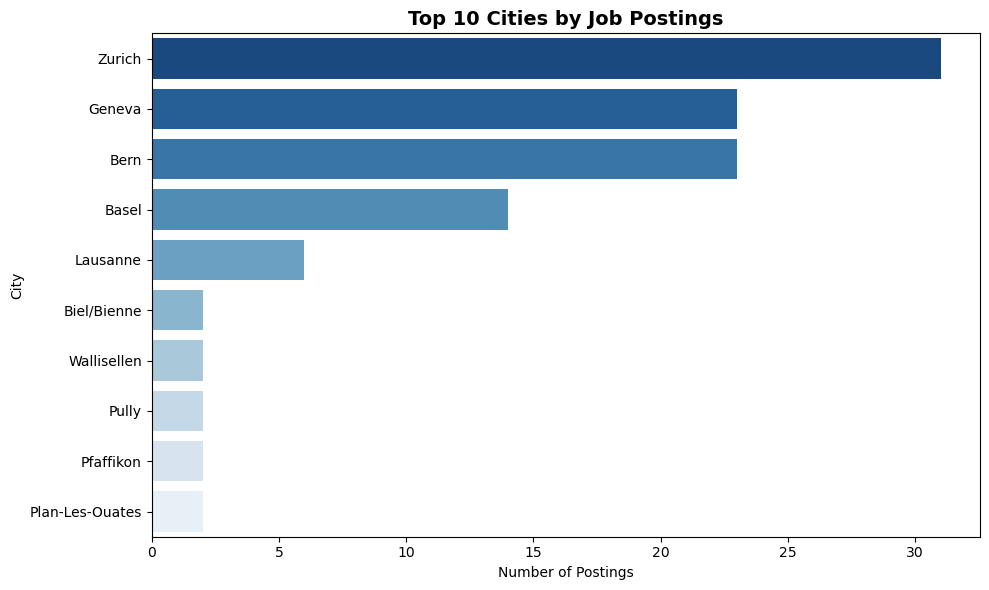

In [83]:
city_counts = jobs_df['city'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette="Blues_r")
plt.title("Top 10 Cities by Job Postings", fontsize=14, weight="bold")
plt.xlabel("Number of Postings")
plt.ylabel("City")
plt.tight_layout()
plt.savefig("../visuals/1_top_cities.png", dpi=300)
plt.show()


Zurich clearly leads in job demand, followed by Geneva and Basel — expected since they are the main business hubs.


## Who is hiring?

Next, I looked at the companies with the most postings.  
This highlights which employers are actively expanding their teams.


C:\Users\vijai\AppData\Local\Temp\ipykernel_6852\532206698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_counts.values, y=company_counts.index, palette="Greens_r")


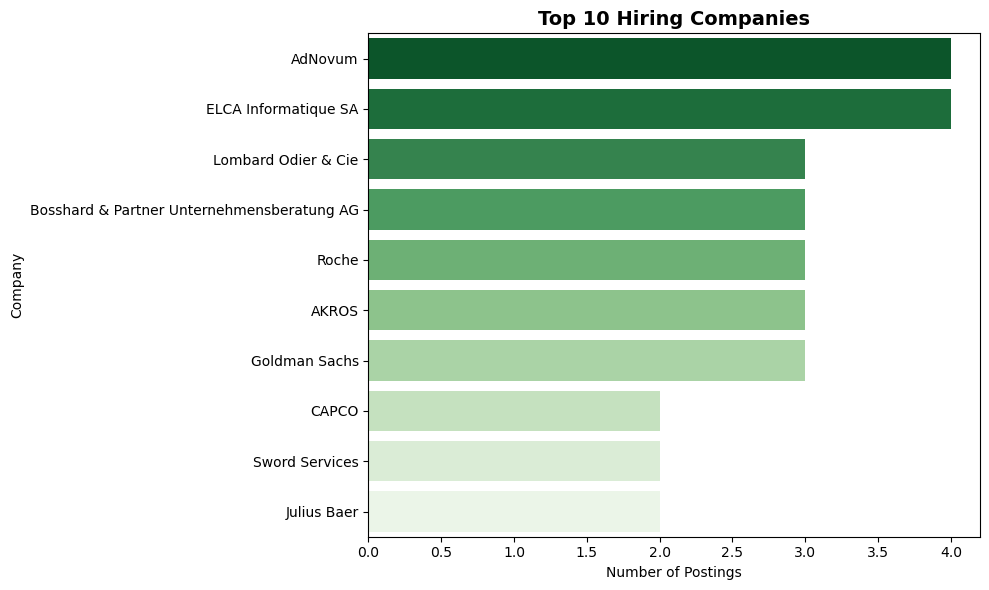

In [84]:
company_counts = jobs_df['company_clean'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=company_counts.values, y=company_counts.index, palette="Greens_r")
plt.title("Top 10 Hiring Companies", fontsize=14, weight="bold")
plt.xlabel("Number of Postings")
plt.ylabel("Company")
plt.tight_layout()
plt.savefig("../visuals/2_top_companies.png", dpi=300)
plt.show()


Large financial and pharma companies dominate the hiring landscape, reflecting Switzerland’s core industries.


## Top 10 Companies vs All Others

While the top 10 companies are important, it’s also useful to see whether they dominate the market or if many smaller employers together account for most postings.  
This gives a sense of how concentrated or distributed the Swiss job market is.


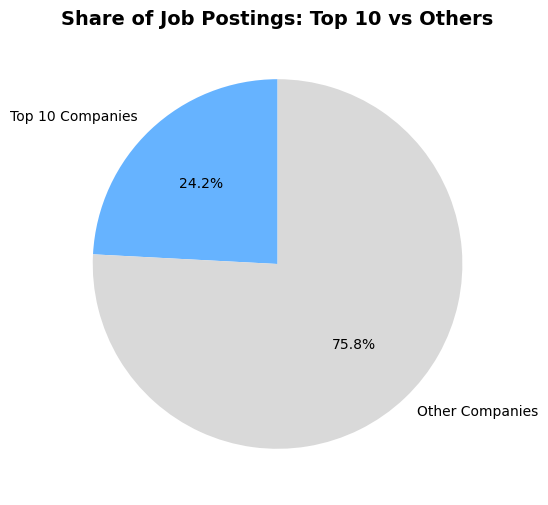

In [85]:
company_counts = jobs_df['company_clean'].value_counts()
top10_share = company_counts.head(10).sum()
others_share = company_counts.sum() - top10_share

plt.figure(figsize=(6,6))
plt.pie(
    [top10_share, others_share],
    labels=["Top 10 Companies", "Other Companies"],
    autopct="%1.1f%%",
    colors=["#66b3ff", "#d9d9d9"],
    startangle=90
)
plt.title("Share of Job Postings: Top 10 vs Others", fontsize=14, weight="bold")
plt.savefig("../visuals/3_company_share.png", dpi=300)
plt.show()


Although big players contribute heavily, a large share of jobs still come from smaller employers, showing an active SME market.


## What roles are in demand?

Here are the most common job titles.  
This gives a sense of the core skills employers are targeting.


C:\Users\vijai\AppData\Local\Temp\ipykernel_6852\3869466979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts.values, y=title_counts.index, palette="Purples_r")


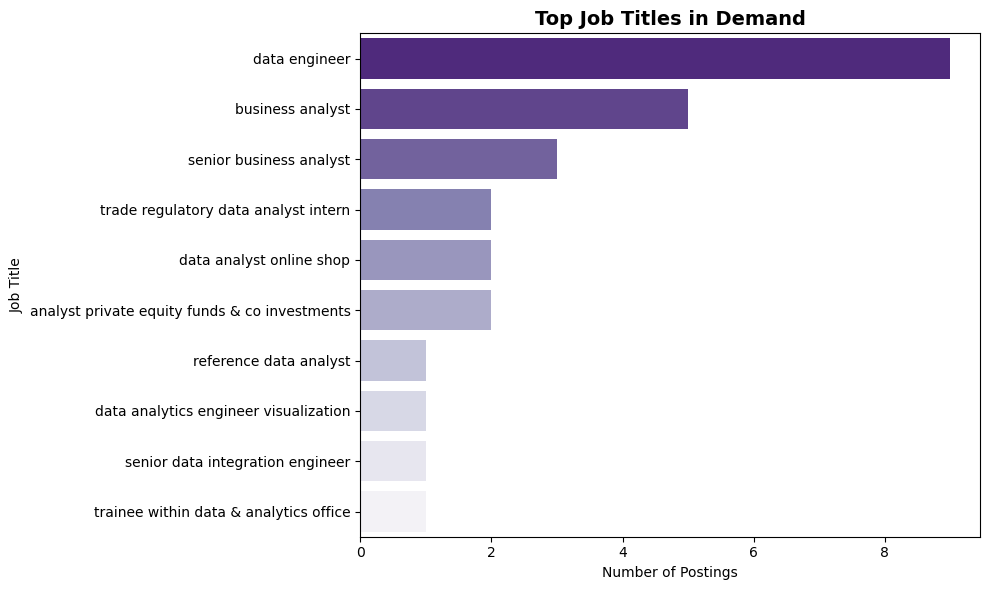

In [86]:
title_counts = jobs_df['title_en'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=title_counts.values, y=title_counts.index, palette="Purples_r")
plt.title("Top Job Titles in Demand", fontsize=14, weight="bold")
plt.xlabel("Number of Postings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.savefig("../visuals/4_top_titles.png", dpi=300)
plt.show()


Data Analyst and Data Engineer roles dominate, while hybrid roles like Business Analyst and Data Scientist are also strong.


## Remote vs Onsite

Remote flexibility has become an important factor in Switzerland’s job market.  
Here’s the split across remote, onsite, and hybrid postings.


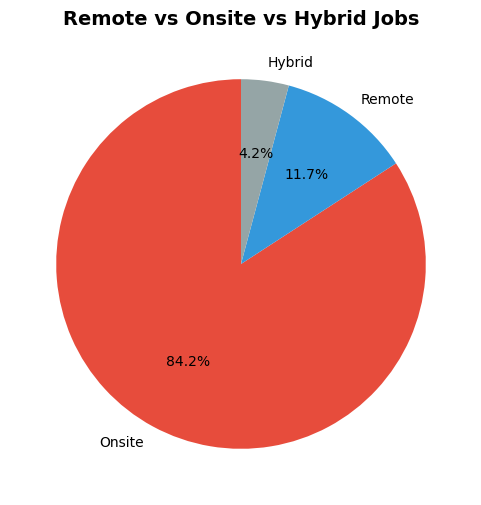

In [87]:
remote_counts = jobs_df['remote_type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(remote_counts.values, labels=remote_counts.index, autopct='%1.1f%%',
        colors=["#E74C3C","#3498DB","#95A5A6"], startangle=90)
plt.title("Remote vs Onsite vs Hybrid Jobs", fontsize=14, weight="bold")
plt.savefig("../visuals/5_remote_vs_onsite.png", dpi=300)
plt.show()


Most jobs are still onsite, but a meaningful share of roles now offer remote or hybrid flexibility.


## Remote vs Onsite by Canton

Looking closer, I compared remote vs onsite across cantons.  
Some regions are more open to remote work, while others remain mostly onsite.


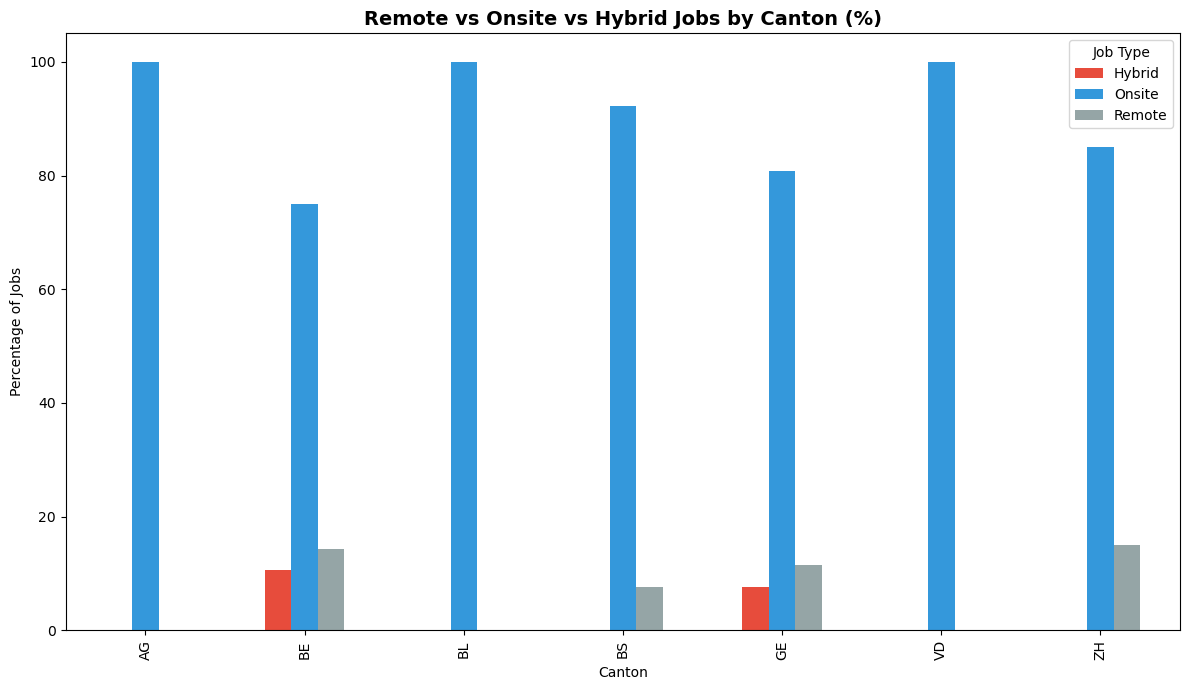

In [88]:
remote_canton = pd.crosstab(jobs_df['canton'], jobs_df['remote_type'])
remote_canton_pct = remote_canton.div(remote_canton.sum(axis=1), axis=0) * 100

remote_canton_pct.plot(
    kind='bar', figsize=(12,7),
    color=["#E74C3C", "#3498DB", "#95A5A6"]
)

plt.title("Remote vs Onsite vs Hybrid Jobs by Canton (%)", fontsize=14, weight="bold")
plt.xlabel("Canton")
plt.ylabel("Percentage of Jobs")
plt.legend(title="Job Type")
plt.tight_layout()
plt.savefig("../visuals/6_remote_by_canton_percentage.png", dpi=300)
plt.show()


Remote opportunities are higher in cantons like Vaud and Zurich, while Geneva shows a stronger onsite preference.


## Seniority Levels

Finally, I checked seniority.  
Most postings are mid-level, but there’s also clear demand for senior professionals.


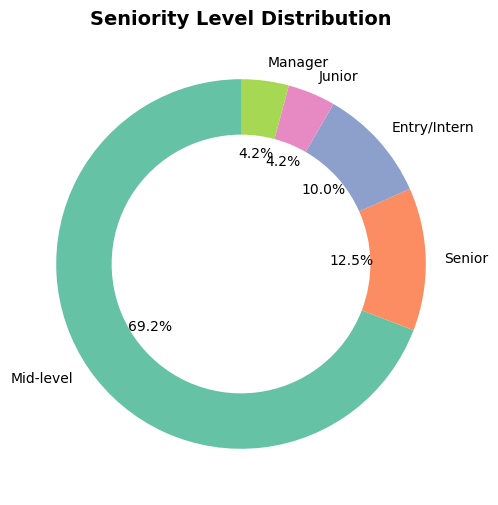

In [89]:
seniority_counts = jobs_df['seniority_level'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(seniority_counts.values, labels=seniority_counts.index, autopct='%1.1f%%',
        startangle=90, wedgeprops=dict(width=0.3),
        colors=sns.color_palette("Set2", len(seniority_counts)))
plt.title("Seniority Level Distribution", fontsize=14, weight="bold")
plt.savefig("../visuals/7_seniority_donut.png", dpi=300)
plt.show()


Mid-level positions dominate the market, but there is also consistent demand for senior professionals.


## City vs Seniority Heatmap

This heatmap shows which cities are hiring more juniors vs seniors.  
It’s useful for recruiters to match candidate seniority with local demand.


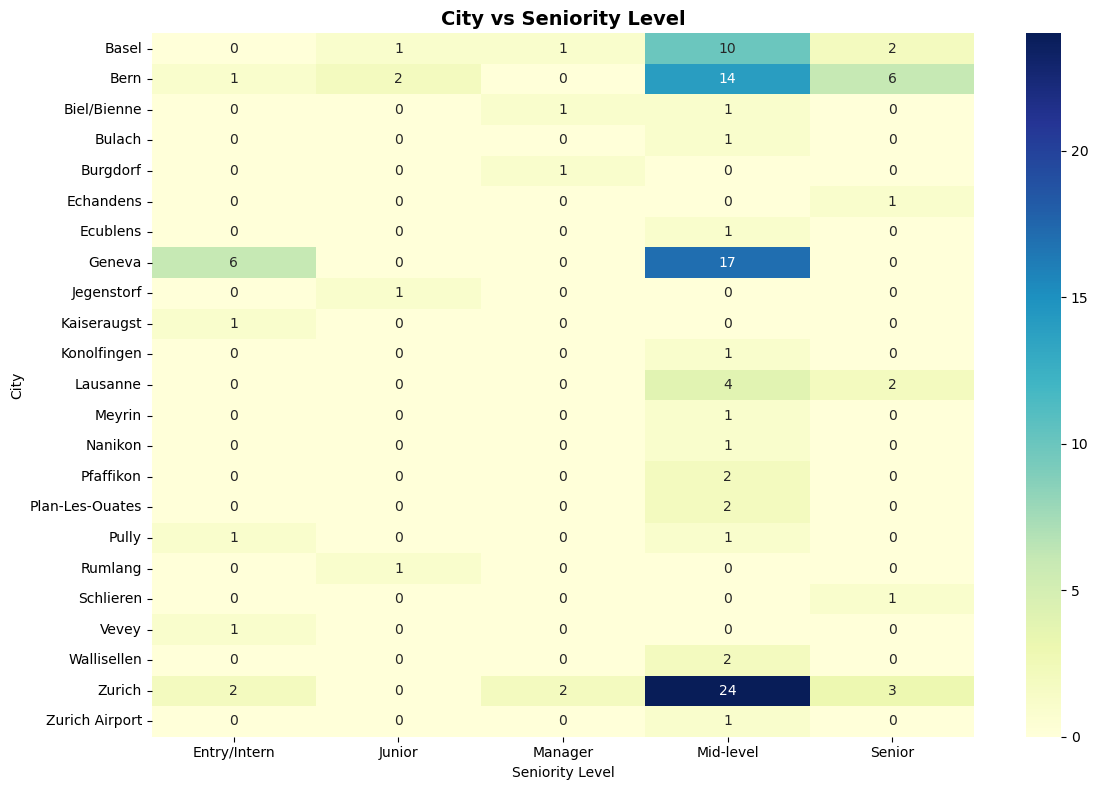

In [90]:
city_seniority = pd.crosstab(jobs_df['city'], jobs_df['seniority_level'])

plt.figure(figsize=(12,8))
sns.heatmap(city_seniority, cmap="YlGnBu", annot=True, fmt="d")
plt.title("City vs Seniority Level", fontsize=14, weight="bold")
plt.ylabel("City")
plt.xlabel("Seniority Level")
plt.tight_layout()
plt.savefig("../visuals/8_city_vs_seniority.png", dpi=300)
plt.show()
  

Basel shows strong demand for senior roles, while Lausanne leans more towards junior opportunities.


## My Closing Notes

While Zurich and Geneva clearly dominate the job market, I was a bit surprised by Vaud showing a higher share of remote roles.  
This matches some discussions I’ve seen in Swiss tech forums where companies in the French-speaking regions are said to be more flexible.  

Another point that stood out to me is Basel’s strong demand for senior roles — likely connected to the pharma industry headquartered there.  
These kinds of insights are useful for recruiters and candidates alike, since they show how hiring needs vary across Switzerland.
